<a href="https://colab.research.google.com/github/tawounfouet/road-to-deeplearning-mastery/blob/main/My_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Neural Network

In [44]:
!git clone https://github.com/MachineLearnia/Deep-Learning-Youtube.git

Cloning into 'Deep-Learning-Youtube'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 36 (delta 10), reused 32 (delta 10), pack-reused 1
Receiving objects: 100% (36/36), 5.28 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

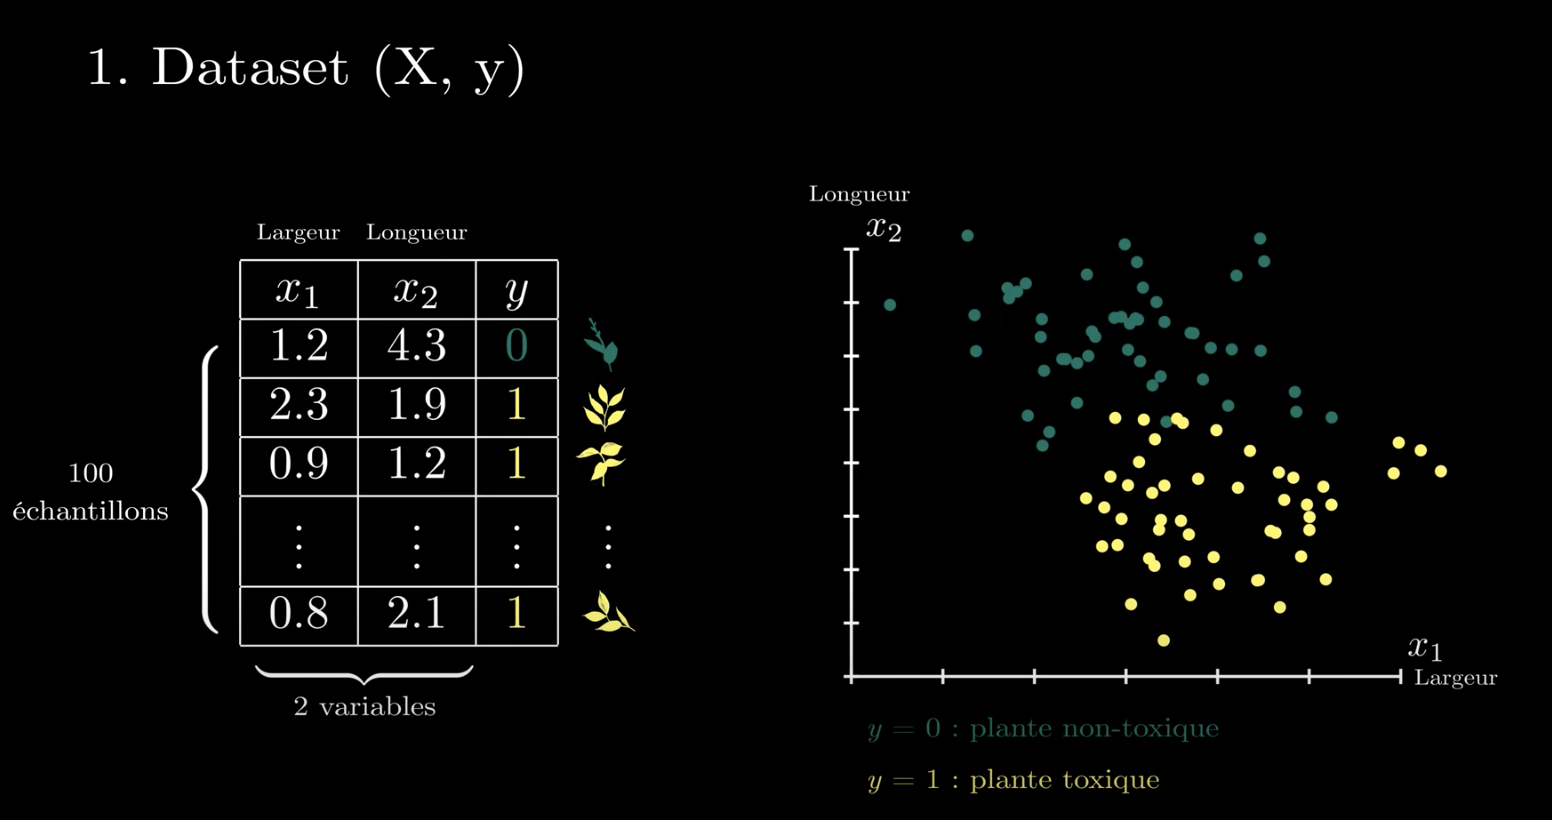

dimensions de X: (100, 2)
dimensions de y: (100, 1)


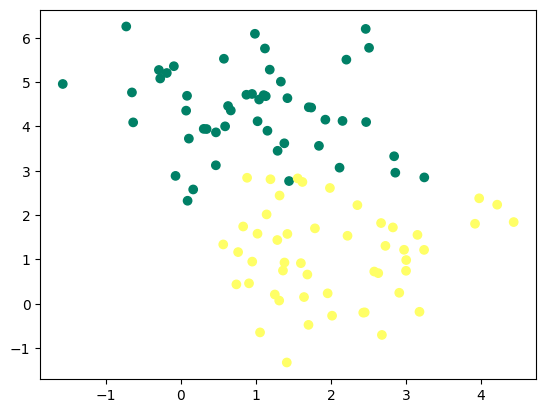

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

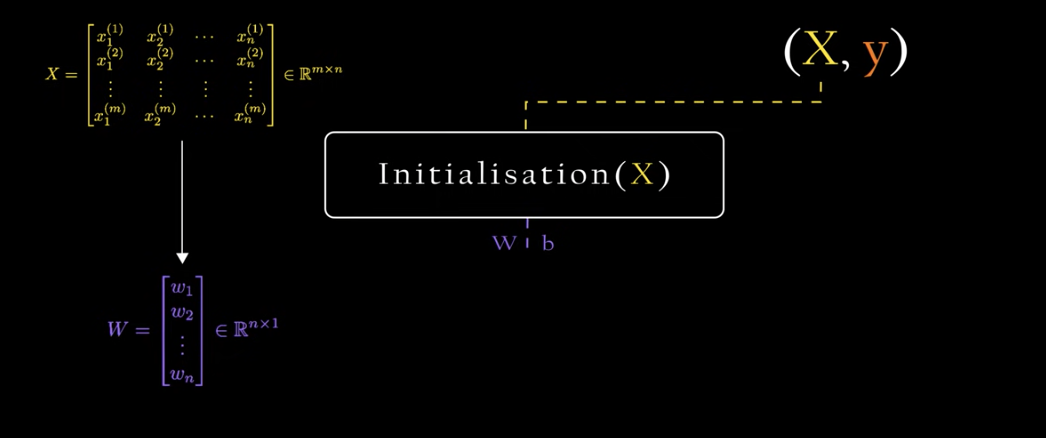

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [5]:
W, b = initialisation(X)

In [9]:
print(f"Shape W : {W.shape}")
print(f"Shape b : {b.shape}")

Shape W : (2, 1)
Shape b : (1,)


In [6]:
W, b

(array([[ 0.54080492],
        [-0.92765445]]),
 array([-0.66936258]))

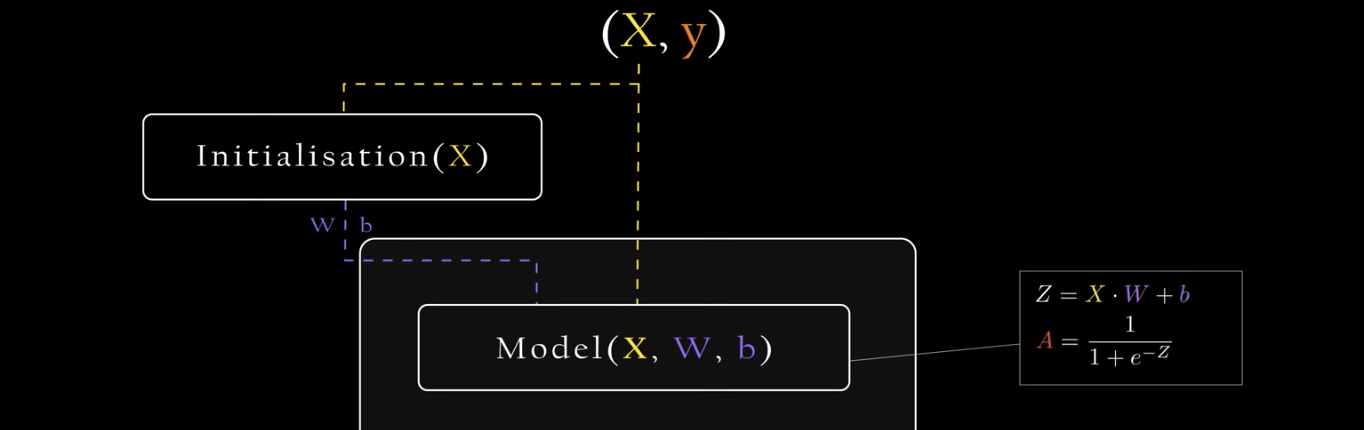

**Forward Propagation:**

1. **Linear Transformation:**
$$Z = X \cdot W + b$$

- `Z`: The weighted sum of the input `X` and weights `W`, plus the bias `b`.
- `X`: Input vector (shape: [n_samples, n_features]).
- `W`: Weight matrix (shape: [n_features, 1]).
- `b`: Bias term (shape: [1]).

2. **Sigmoid Activation:**
$$A = \frac{1}{1 + e^{-Z}}$$

- `A`: The output of the neuron after applying the sigmoid activation function.
- `e`: Euler's number (approximately 2.71828).

**Overall Formula (Combining Steps):**
$$A = \frac{1}{1 + e^{-(X \cdot W + b)}}$$

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [11]:
A = model(X, W, b)
A.shape

(100, 1)

In [12]:
A[:10]

array([[0.38685941],
       [0.35320142],
       [0.00394019],
       [0.05861053],
       [0.48947497],
       [0.0789367 ],
       [0.0191629 ],
       [0.32650065],
       [0.01690903],
       [0.45377997]])

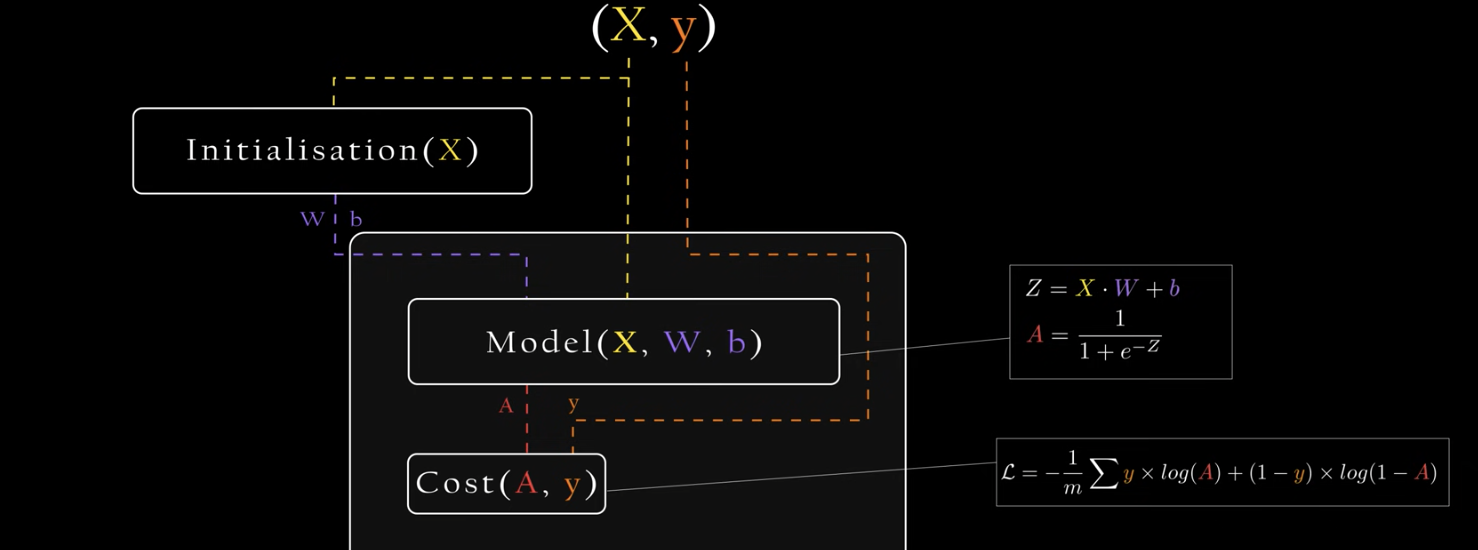

$$
LogLoss = \frac{1}{N} \sum_{i=1}^{N} [y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i)]
$$

In [13]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [16]:
log_loss(A, y)

0.5850849447531671

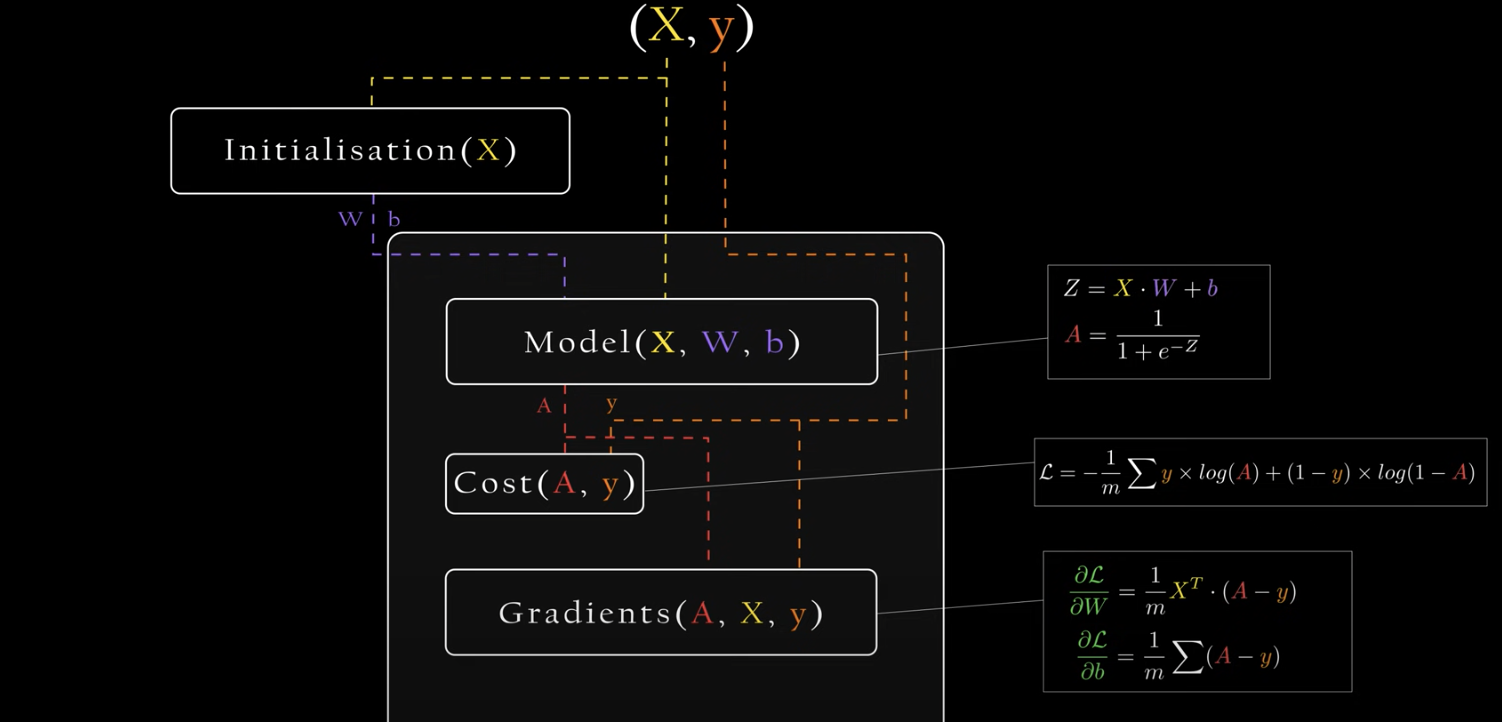

**Backpropagation - Gradients:**

The `gradients` function calculates the gradients of the loss function with respect to the weights (`W`) and bias (`b`) of the simple neural network.

**Formulas:**

$$dW = \frac{1}{m} X^T (A - y)$$

$$db = \frac{1}{m} \sum_{i=1}^{m} (A_i - y_i)$$

**Explanation:**

- `dW`: Gradient of the loss with respect to the weights `W`.
- `db`: Gradient of the loss with respect to the bias `b`.
- `m`: Number of training examples.
- `X^T`: Transpose of the input matrix `X`.
- `A`: Output vector of the neural network (activations after applying the sigmoid function).
- `y`: Ground truth labels vector.
- `i`: Index iterating over each training example.
- `A_i`: Activation value for the i-th training example.
- `y_i`: Ground truth label for the i-th training example.

**Breakdown:**

- The gradients are calculated using the concept of backpropagation.
- `dW` represents the average change in the loss function for a small change in each weight element. It's computed by multiplying the transpose of the input matrix `X^T` with the difference between the network's output `A` and the ground truth labels `y`.
- `db` represents the average change in the loss function for a small change in the bias term `b`. It's computed by summing the difference between the network's output `A_i` for each training example and the corresponding ground truth label `y_i`. Dividing by `m` ensures the gradients are scaled by the number of training examples.


**Calcul des gradients pour le réseau de neurones simple avec activation sigmoïde**

En calculant le coût de la fonction et en le propageant en arrière (backpropagation), on peut obtenir les gradients des paramètres (poids `W` et biais `b`). Ces gradients indiquent la direction dans laquelle les paramètres doivent être ajustés pour minimiser le coût.

**Formules des gradients:**

$$dW = \frac{1}{m} \cdot X^T \cdot (A - y)$$

$$db = \frac{1}{m} \cdot \sum\limits_{i=1}^{m} (A_i - y_i)$$

**Où:**

- `dW`: Gradient par rapport aux poids `W` (shape: [nombre_features, 1]).
- `db`: Gradient par rapport au biais `b` (shape: [1]).
- `m`: Nombre d'échantillons dans l'ensemble de données (taille du lot).
- `X`: Matrice d'entrée (shape: [m, nombre_features]).
- `A`: Sortie du réseau après activation sigmoïde (shape: [m, 1]).
- `y`: Vecteur d'étiquettes réelles (shape: [m, 1]).
- `T`: Transposé de la matrice.

**Explications:**

1. **`dW` (Gradient par rapport aux poids):**
    - Le gradient `dW` est calculé en multipliant la transposée de la matrice d'entrée `X^T` avec la différence entre la sortie activée `A` et les étiquettes réelles `y`.
    - On effectue ensuite la moyenne par rapport au nombre d'échantillons `m` pour obtenir une mise à jour moyenne des poids.

2. **`db` (Gradient par rapport au biais):**
    - Le gradient `db` est calculé en sommant la différence entre la sortie activée `A` (pour chaque échantillon) et les étiquettes réelles `y`.
    - On effectue ensuite la moyenne par rapport au nombre d'échantillons `m` pour obtenir une mise à jour moyenne du biais.

**En résumé, ces formules permettent de calculer les gradients qui seront utilisés pour mettre à jour les poids et le biais du réseau de neurones lors de l'apprentissage.**


In [18]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [19]:
dW, db = gradients(A, X, y)

In [21]:
dW, db

(array([[-0.56031067],
        [-0.38012788]]),
 -0.29339332426184406)

In [22]:
dW.shape, db.shape

((2, 1), ())

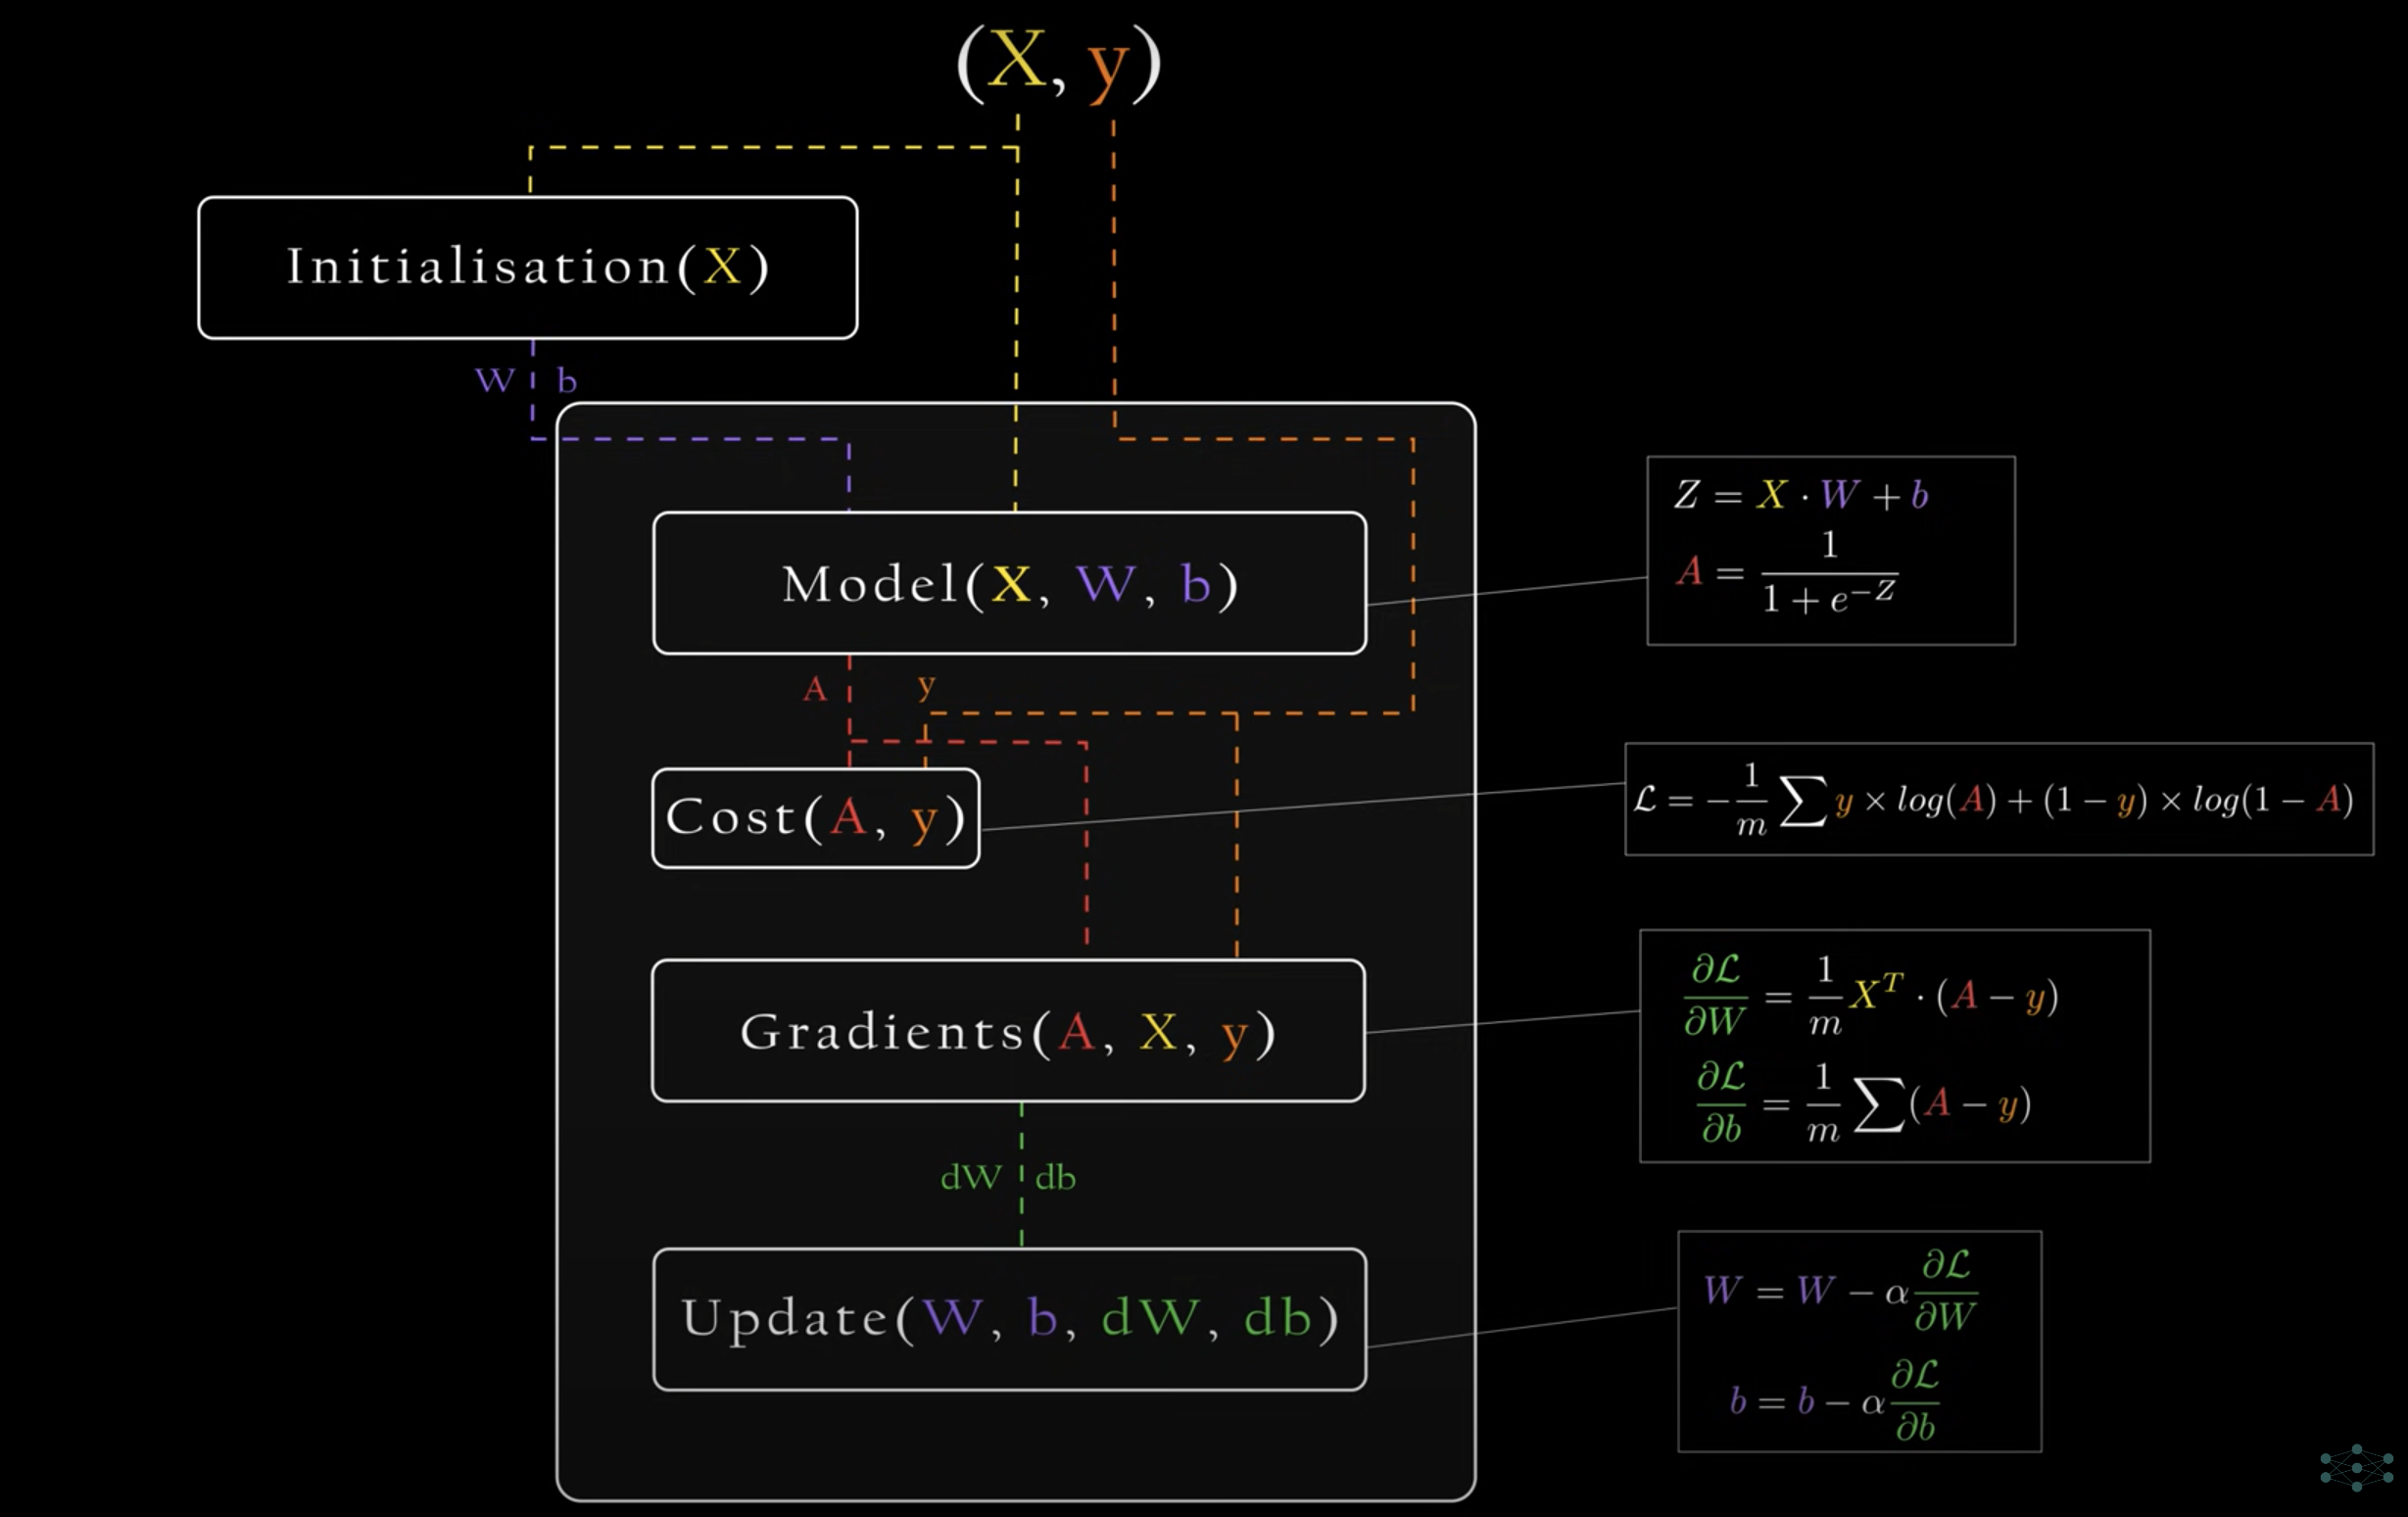

**Mise à jour des paramètres du réseau de neurones simple**

Cette fonction permet de mettre à jour les poids `W` et le biais `b` du réseau de neurones simple en utilisant les gradients `dW` et `db` calculés précédemment.



In [23]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [24]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

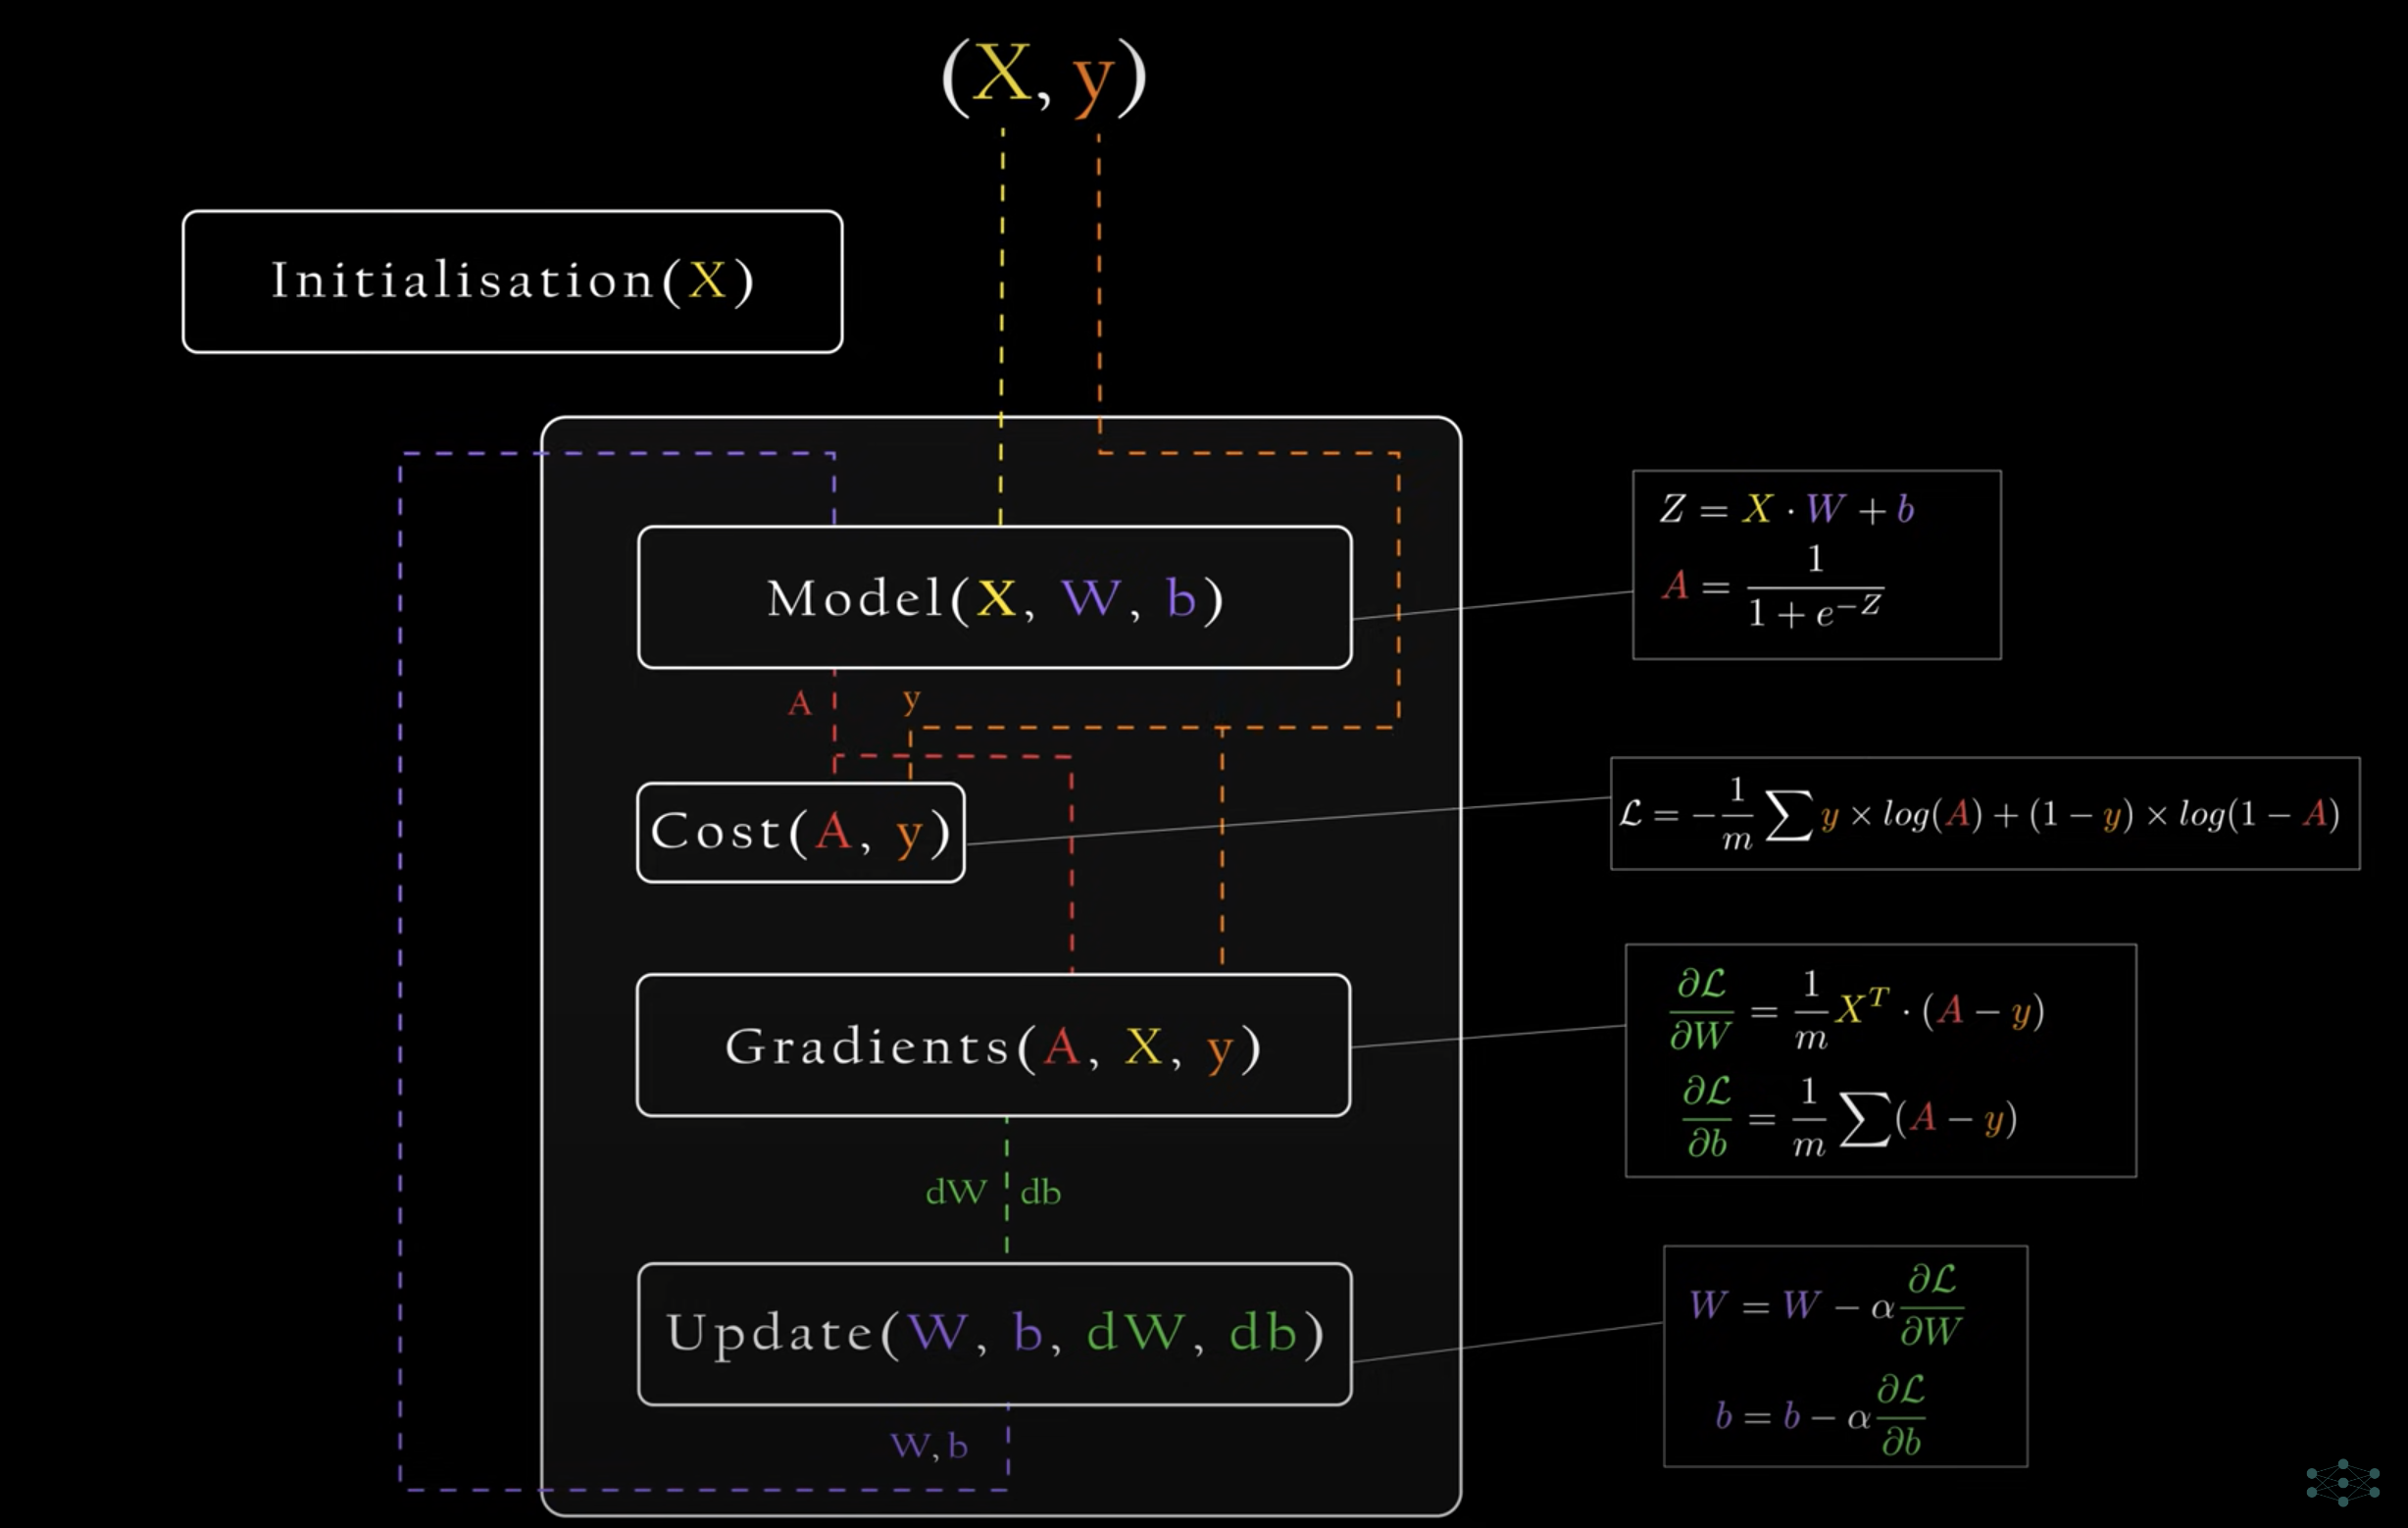

In [25]:
from sklearn.metrics import accuracy_score

In [37]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)


0.87


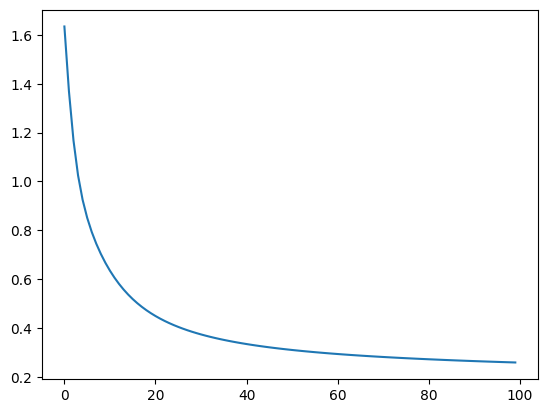

In [38]:
W, b = artificial_neuron(X, y)

In [40]:
W, b

(array([[ 1.25238416],
        [-0.91496146]]),
 array([0.09575631]))

# 3. Frontiere de décision

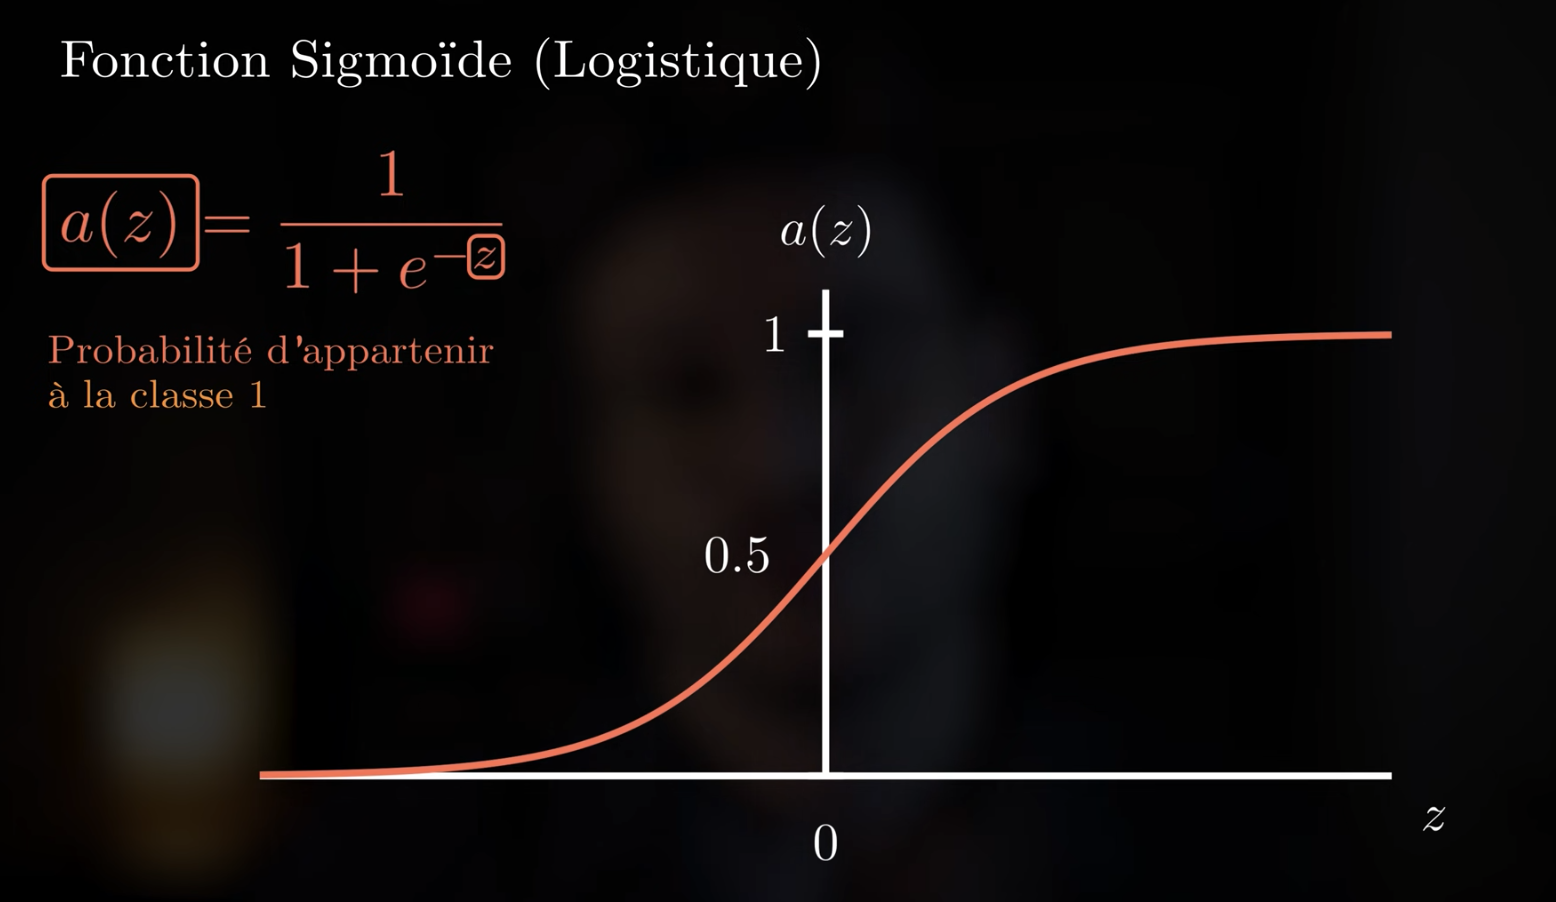

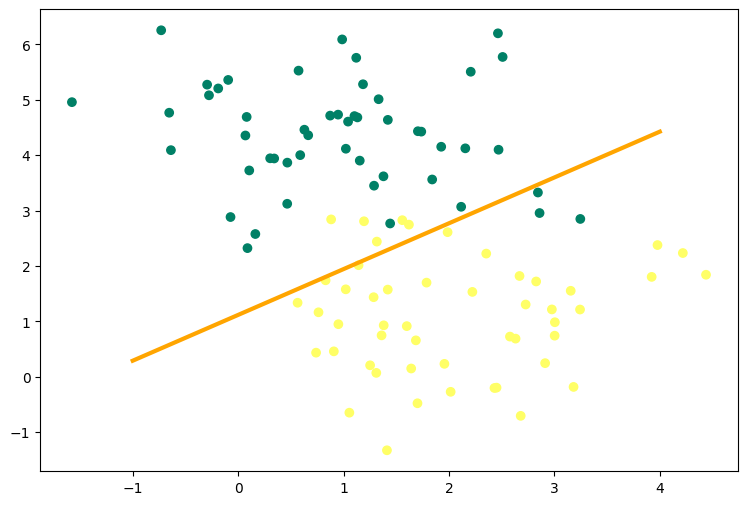

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# 4. Visualisations 3D

In [29]:
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [31]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


# Exercice - Cat vs Dog

In [33]:
!pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
#from utilities import *

In [42]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels

    return X_train, y_train, X_test, y_test

In [45]:
X_train, y_train, X_test, y_test = load_data()

In [46]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [47]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


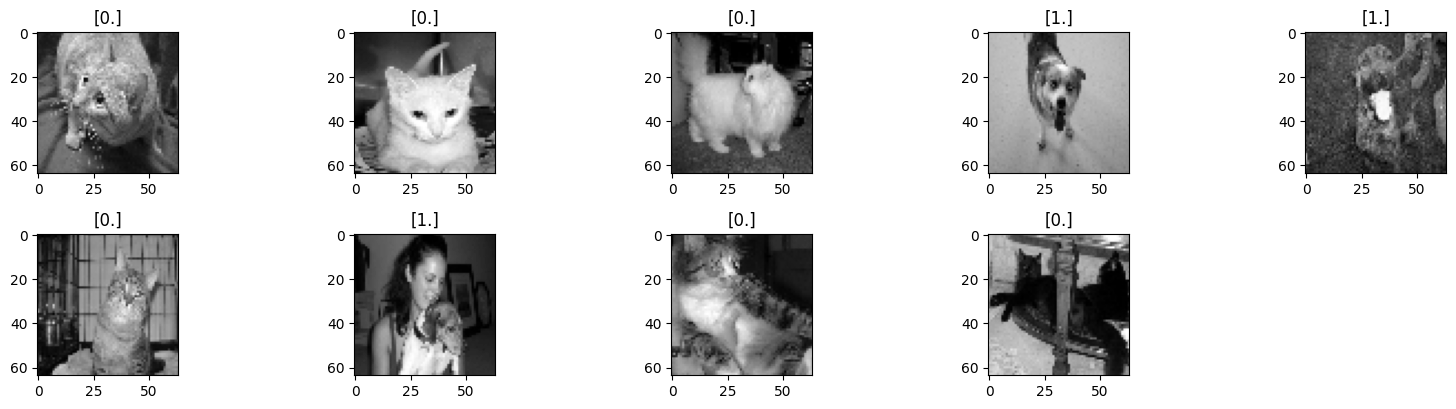

In [48]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
# TO DO
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !